In [1]:
!wget www.di.ens.fr/~lelarge/MNIST.tar.gz
!tar -zxvf MNIST.tar.gz

--2021-05-15 10:58:36--  http://www.di.ens.fr/~lelarge/MNIST.tar.gz
Resolving www.di.ens.fr (www.di.ens.fr)... 129.199.99.14
Connecting to www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.di.ens.fr/~lelarge/MNIST.tar.gz [following]
--2021-05-15 10:58:37--  https://www.di.ens.fr/~lelarge/MNIST.tar.gz
Connecting to www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-gzip]
Saving to: ‘MNIST.tar.gz’

MNIST.tar.gz            [           <=>      ]  33.20M  2.99MB/s    in 12s     

2021-05-15 10:58:50 (2.73 MB/s) - ‘MNIST.tar.gz’ saved [34813078]

x MNIST/
x MNIST/raw/
x MNIST/raw/train-labels-idx1-ubyte
x MNIST/raw/t10k-labels-idx1-ubyte.gz
x MNIST/raw/t10k-labels-idx1-ubyte
x MNIST/raw/t10k-images-idx3-ubyte.gz
x MNIST/raw/train-images-idx3-ubyte
x MNIST/raw/train-labels-idx1-ubyte.gz
x MNIST/raw/t10k-images-idx3-u

In [2]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [57]:
x_test = (x_test/255-0.1308)/0.3088
x_train = (x_train/255-0.1308)/0.3088
x_test = 255*(x_test-x_test.min())/(x_test.max()-x_test.min())
x_train = 255*(x_train-x_train.min())/(x_train.max()-x_train.min())

In [7]:
x_train.max()

255

In [5]:
import numpy as np
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
np.savez_compressed('mnist_norm.npz',image_train_filtered=x_train,label_train_filtered=y_train,image_test_filtered=x_test,label_test_filtered=y_test)

In [43]:
array = np.ones(10)

(array([ 0.,  0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <a list of 10 Patch objects>)

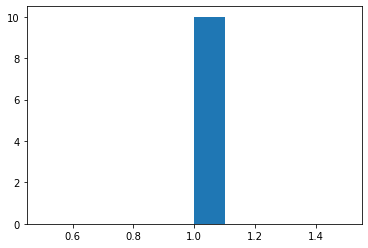

In [44]:
import matplotlib.pyplot as plt
plt.hist(array)

In [1]:
import numpy as np
import tensorflow as tf
fmnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fmnist.load_data()
np.savez_compressed('fmnist_norm.npz',image_train_filtered=x_train,label_train_filtered=y_train,image_test_filtered=x_test,label_test_filtered=y_test)

In [23]:
import numpy as np
import torch
import torchvision
from torchvision import datasets, transforms

In [25]:
transform=transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.1308,), (0.3088,) )
                             ])

trainset = datasets.MNIST(root='./data', train=True, download=False, transform=transform)
testset = datasets.MNIST(root='./data', train=False, download=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=60000, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=10000, shuffle=True)
dataiter_train = iter(trainloader) # creating a iterator
images_train, labels_train = dataiter_train.next()
dataiter_test = iter(testloader) # creating a iterator
images_test, labels_test = dataiter_test.next()

images_train = (images_train - images_train.min())/(images_train.max()-images_train.min())
images_test = (images_test - images_test.min())/(images_test.max()-images_test.min())

RuntimeError: Dataset not found. You can use download=True to download it

In [26]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST(root='./data',train=True, download=False,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=60000, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST( root='./data',train=False, download=False,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=10000, shuffle=True)

RuntimeError: Dataset not found. You can use download=True to download it

In [8]:
images_test *=256
images_train *=256

NameError: name 'images_test' is not defined

In [30]:
images_test = np.array(images_test)
images_train = np.array(images_train)
images_train = images_train[:,0,:,:]
images_test = images_test[:,0,:,:]

In [61]:
# images_test = images_test.astype(int)
# images_train = images_train.astype(int)

In [31]:
np.savez_compressed('qmnist_norm.npz',image_train_filtered=images_train,label_train_filtered=labels_train,image_test_filtered=images_test,label_test_filtered=labels_test)

In [63]:
data = np.load('qmnist.npz', allow_pickle=True)
image_test_filtered = data['image_test_filtered']
label_test_filtered = data['label_test_filtered']

In [64]:
image_test_filtered.shape

(60000, 28, 28)

In [8]:
training_set = images_train

In [16]:
images_train.mean()

0.13083333

In [18]:
# images_train.std()

0.30880386

In [38]:
#Fashion MNIST

transform=transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.2859,), (0.3530,) )
                             ])

trainset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
testset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=60000, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=60000, shuffle=True)
dataiter_train = iter(trainloader) # creating a iterator
images_train, labels_train = dataiter_train.next()
dataiter_test = iter(testloader) # creating a iterator
images_test, labels_test = dataiter_test.next()

images_train = (images_train - images_train.min())/(images_train.max()-images_train.min())
images_test = (images_test - images_test.min())/(images_test.max()-images_test.min())

images_test *=256
images_train *=256

images_test = np.array(images_test)
images_train = np.array(images_train)
images_train = images_train[:,0,:,:]
images_test = images_test[:,0,:,:]

np.savez_compressed('fmnist_norm.npz',image_train_filtered=images_train,label_train_filtered=labels_train,image_test_filtered=images_test,label_test_filtered=labels_test)

In [44]:
images_train.min()

0.0